In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import needell_ssnmf
from needell_ssnmf import Needell_SSNMF

import display_ssnmf
from display_ssnmf import *

In [2]:
data = np.load('dataset3.npz')
X = data['X']
Y = data['Y']
train_indices = data['train_indices']
test_indices = data['test_indices']

print(train_indices)
ssnmf = Needell_SSNMF(X,Y, split_train_test=False, train_indices=train_indices, test_indices=test_indices)
train_results, test_results, reconerr_results = ssnmf.fulldatasearch(param_range={'k': range(3,10),'lambda': np.linspace(0,1,10), 'random_state': range(0,10)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)


[   0    1    2 ... 1997 1998 1999]
best train results:  (1.0, {'k': 3, 'lambda': 0.5555555555555556, 'random_state': 4}, 23.942273639410434, 10.329032613131217, 0.062)
best test results:  (0.482, {'k': 9, 'lambda': 1.0, 'random_state': 4})


Best train:  1.0
Best test:  0.482


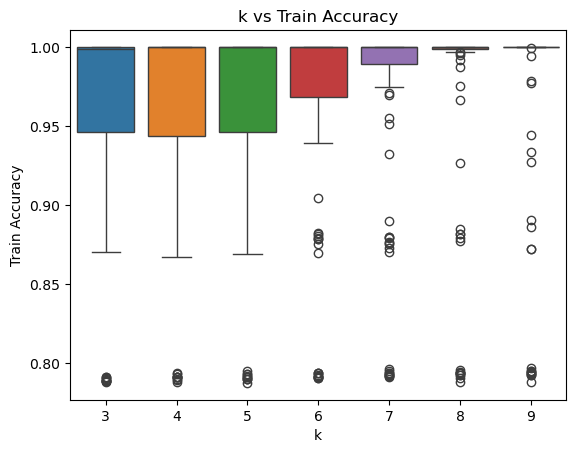

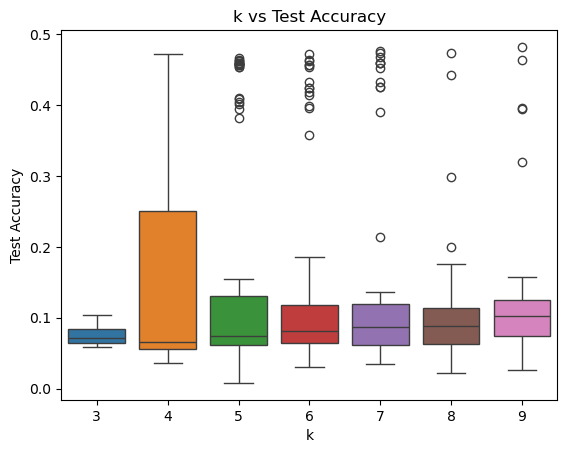

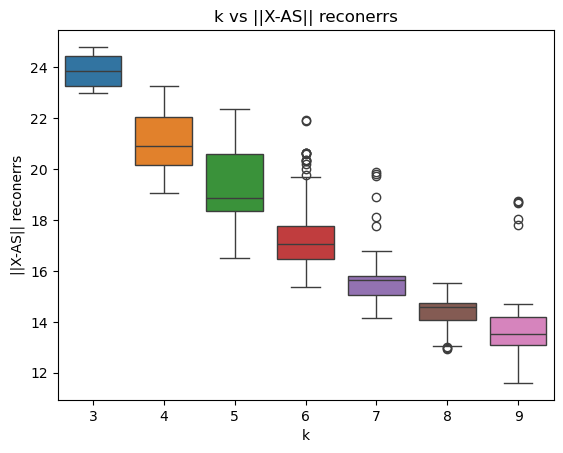

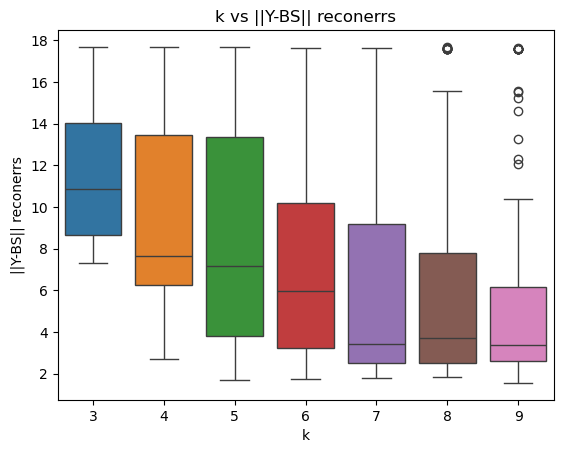

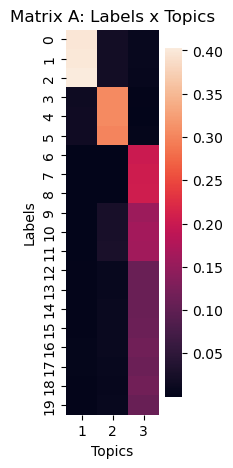

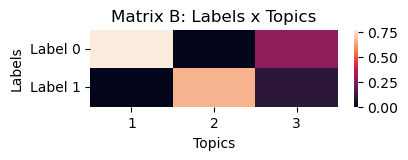

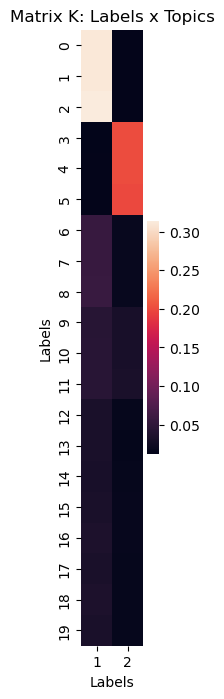

In [3]:
best_train_accu = train_results['best_train_accu']
best_train_param = train_results['best_train_param']
train_accu_distr = train_results['train_accu_distr']

best_test_accu = test_results['best_test_accu']
best_test_param = test_results['best_test_param']
test_accu_distr = test_results['test_accu_distr']

print('Best train: ', best_train_accu)
print('Best test: ', best_test_accu)

display_distr(train_accu_distr, ylabel='Train Accuracy')
display_distr(test_accu_distr, ylabel='Test Accuracy')

Xreconerr_distr = reconerr_results['Xreconerr_distr']
Yreconerr_distr = reconerr_results['Yreconerr_distr']

display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')

names = 'Labels'
labels = list(range(0, X.shape[1]))
best_model = ssnmf.get_best_fulldata_model()
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels={'Label 0','Label 1'}) 